In [29]:
# ===========================================
# 1. Importación de Librerías
# ===========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold


In [30]:
# ===========================================
# 2. Carga del Dataset
# ===========================================
df = pd.read_csv('dataset/mushrooms.csv')

# Vista inicial
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dimensiones del dataset: (8124, 23)

Distribución de la variable objetivo:
class
e    4208
p    3916
Name: count, dtype: int64


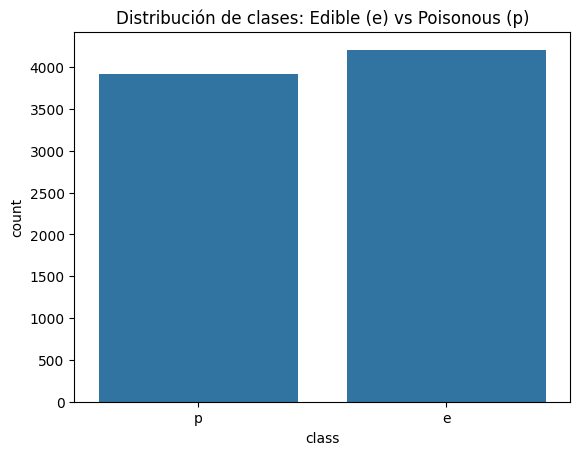

In [31]:
# ===========================================
# 3. Análisis Exploratorio de Datos (EDA)
# ===========================================
print(f"Dimensiones del dataset: {df.shape}")
print("\nDistribución de la variable objetivo:")
print(df['class'].value_counts())

sns.countplot(data=df, x='class')
plt.title('Distribución de clases: Edible (e) vs Poisonous (p)')
plt.show()

In [32]:
# Revisión de valores únicos por columna
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [33]:
# ===========================================
# 4. Preprocesamiento y Codificación
# ===========================================
# Todos los atributos son categóricos, usamos LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Revisión
df_encoded.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [34]:
# ===========================================
# 5. División de Datos
# ===========================================
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']  # 0 = edible, 1 = poisonous (depende de LabelEncoder)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")


Tamaño de entrenamiento: (6499, 22)
Tamaño de prueba: (1625, 22)


In [35]:
# ===========================================
# 6. Entrenamiento del Modelo Naive Bayes
# ===========================================
model = CategoricalNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)


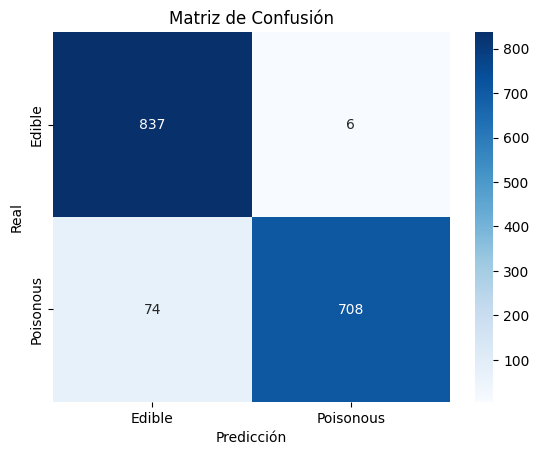


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Precisión del Modelo: 95.08%


In [36]:
# ===========================================
# 7. Evaluación del Modelo
# ===========================================
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte Completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Precisión Global
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del Modelo: {accuracy*100:.2f}%")


In [ ]:
# ===========================================
# 8. Validación Cruzada
# ===========================================

# Usamos StratifiedKFold para mantener la proporción de clases
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Realizamos la validación cruzada
scores = cross_val_score(CategoricalNB(), X, y, cv=cv_strategy, scoring='accuracy')
print(f"Precisión promedio en Validación Cruzada: {np.mean(scores)*100:.2f}%")
print(f"Desviación estándar: {np.std(scores)*100:.2f}%")
print(f"Puntuaciones individuales: {[f'{score*100:.2f}%' for score in scores]}")

Precisión promedio en Validación Cruzada: 95.27%
Desviación estándar: 0.66%
Puntuaciones individuales: ['95.02%', '95.88%', '95.57%', '94.09%', '95.81%']


In [38]:
# ===========================================
# 9. Prueba con Ejemplo Real
# ===========================================
# Seleccionamos un hongo aleatorio y mostramos predicción
ejemplo = X.sample(1, random_state=1)
pred = model.predict(ejemplo)[0]

clase_real = y.loc[ejemplo.index[0]]
print(f"Hongo seleccionado: {ejemplo.values.flatten()}")
print(f"Clase real: {'Edible' if clase_real == 0 else 'Poisonous'}")
print(f"Predicción del Modelo: {'Edible' if pred == 0 else 'Poisonous'}")

Hongo seleccionado: [2 2 8 0 5 1 1 0 3 1 3 0 0 7 7 0 2 1 0 2 0 1]
Clase real: Edible
Predicción del Modelo: Edible
